# Employee Attrition Prediction Case Study

<a id='top'></a>
#### Outline: 
#### 1. <a href='#import'>Imports/Introduction</a>
#### 2. <a href='#EDA'>Exploratory Data Analysis</a>
21. <a href='#feature_distribution'>Feature Distribution</a>
22. <a href='#feature_correlation'>Features Correlation</a>
23. <a href='#feature_analysis'>Understanding Feature Relationships with the Target Variable</a>

#### 3. <a href='#feature-pre'>Feature Preprocessing</a>

#### 4. <a href='#ML'>Model Training and Evaluation</a>
41. <a href='#model_training'>Model Training</a>
42. <a href='#model_evaluation'>Model Evaluation</a>
43. <a href='#model_explanability'> Model Explanability</a>

<a id='import'></a>
## 1. Imports/Introduction

This case study focuses on **classifying employee attrition**, representing the departure of employees from a company. This phenomenon poses substantial challenges for businesses, including lost productivity, escalated hiring expenses, and diminished morale. 

The project's objective is to construct a machine learning model using **employee data**, including factors like job satisfaction, performance, and compensation, to accurately **classify instances of employee attrition**.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (confusion_matrix,
                             precision_recall_curve,
                             classification_report,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_curve,
                             auc)

import time
from pathlib import Path
import os
import joblib
from collections import defaultdict
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

| No. | Column Name               | Meaning                                                                                      | Type   |
|-----|---------------------------|----------------------------------------------------------------------------------------------|--------|
| 0   | Age                       | Employee's age                                                                               | int64  |
| 1   | Attrition (Target)        | Whether the employee left the company (Yes/No)                                                | object |
| 2   | BusinessTravel            | Frequency of business travel (Travel_Rarely, Travel_Frequently, Non-Travel)                   | object |
| 3   | DailyRate                 | Employee's daily rate of pay                                                                 | int64  |
| 4   | Department                | Department the employee belongs to (e.g., Sales, Research & Development, Human Resources)     | object |
| 5   | DistanceFromHome          | Distance between employee's home and workplace                                                 | int64  |
| 6   | Education                 | Level of education achieved (1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor') | int64  |
| 7   | EducationField            | Field of education studied                                                                   | object |
| 8   | EmployeeCount             | Number of employees                                                                         | int64  |
| 9   | EmployeeNumber            | Unique identifier for each employee                                                           | int64  |
| 10  | EnvironmentSatisfaction   | Employee's satisfaction with the work environment (1 'Low' - 4 'Very High')                    | int64  |
| 11  | Gender                    | Employee's gender                                                                            | object |
| 12  | HourlyRate                | Employee's hourly rate of pay                                                                | int64  |
| 13  | JobInvolvement            | Level of job involvement (1 'Low' - 4 'Very High')                                           | int64  |
| 14  | JobLevel                  | Level of the job role within the company (1-5)                                                | int64  |
| 15  | JobRole                   | Specific role/job title                                                                      | object |
| 16  | JobSatisfaction           | Employee's job satisfaction (1 'Low' - 4 'Very High')                                              | int64  |
| 17  | MaritalStatus             | Employee's marital status                                                                    | object |
| 18  | MonthlyIncome             | Employee's monthly income                                                                    | int64  |
| 19  | MonthlyRate               | Employee's monthly rate of pay                                                               | int64  |
| 20  | NumCompaniesWorked        | Number of companies the employee has worked for                                               | int64  |
| 21  | Over18                    | Whether the employee is over 18 years old                                                       | object |
| 22  | OverTime                  | Whether the employee works overtime (Yes/No)                                                  | object |
| 23  | PercentSalaryHike         | Percentage increase in salary                                                                | int64  |
| 24  | PerformanceRating         | Employee's performance rating (1 'Low' - 4 'Outstanding')                                 | int64  |
| 25  | RelationshipSatisfaction  | Satisfaction with work relationships (1 'Low' - 4 'Very High')                              | int64  |
| 26  | StandardHours             | Standard hours for the employee's job                                                        | int64  |
| 27  | StockOptionLevel          | Employee's stock option level (0-3)                                                           | int64  |
| 28  | TotalWorkingYears         | Total years the employee has worked                                                          | int64  |
| 29  | TrainingTimesLastYear     | Number of training times last year                                                           | int64  |
| 30  | WorkLifeBalance           | Employee's work-life balance satisfaction (1 'Bad' - 4 'Best')                                | int64  |
| 31  | YearsAtCompany            | Number of years the employee has worked at the company                                        | int64  |
| 32  | YearsInCurrentRole        | Number of years the employee has been in the current role                                     | int64  |
| 33  | YearsSinceLastPromotion   | Number of years since the last promotion                                                      | int64  |
| 34  | YearsWithCurrManager      | Number of years with the current manager                                                      | int64  |


In [2]:
# Data-source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
df = pd.read_csv('Human_Resources.csv')

In [3]:
# 35 features in total, each contains 1470 data points
# we don't have any missing values
print('Null Count: ', df.isnull().any(axis=1).sum())
print(df.info(verbose=1))

Null Count:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

In [4]:
# this allows us to see the distribution and mean values that each feature has for us to get to know the data we are working with
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.describe(include= 'O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [6]:
# Features to drop
# EmployeeNumber is an ID
# EmployeeCount, StandardHours, Over18 has only 1 unique value
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

In [7]:
# seeing if we have duplicated rows
df.duplicated().sum()

0

In [8]:
# Let's replace the 'Attritition', 'OverTime' column with integers before performing any visualizations in our next section
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

<a href='#top'>back to top</a>

<a id='EDA'></a>
## 2. Exploratory Data Analysis

<a id='feature_distribution'></a>
### 2.1. Feature Distribution

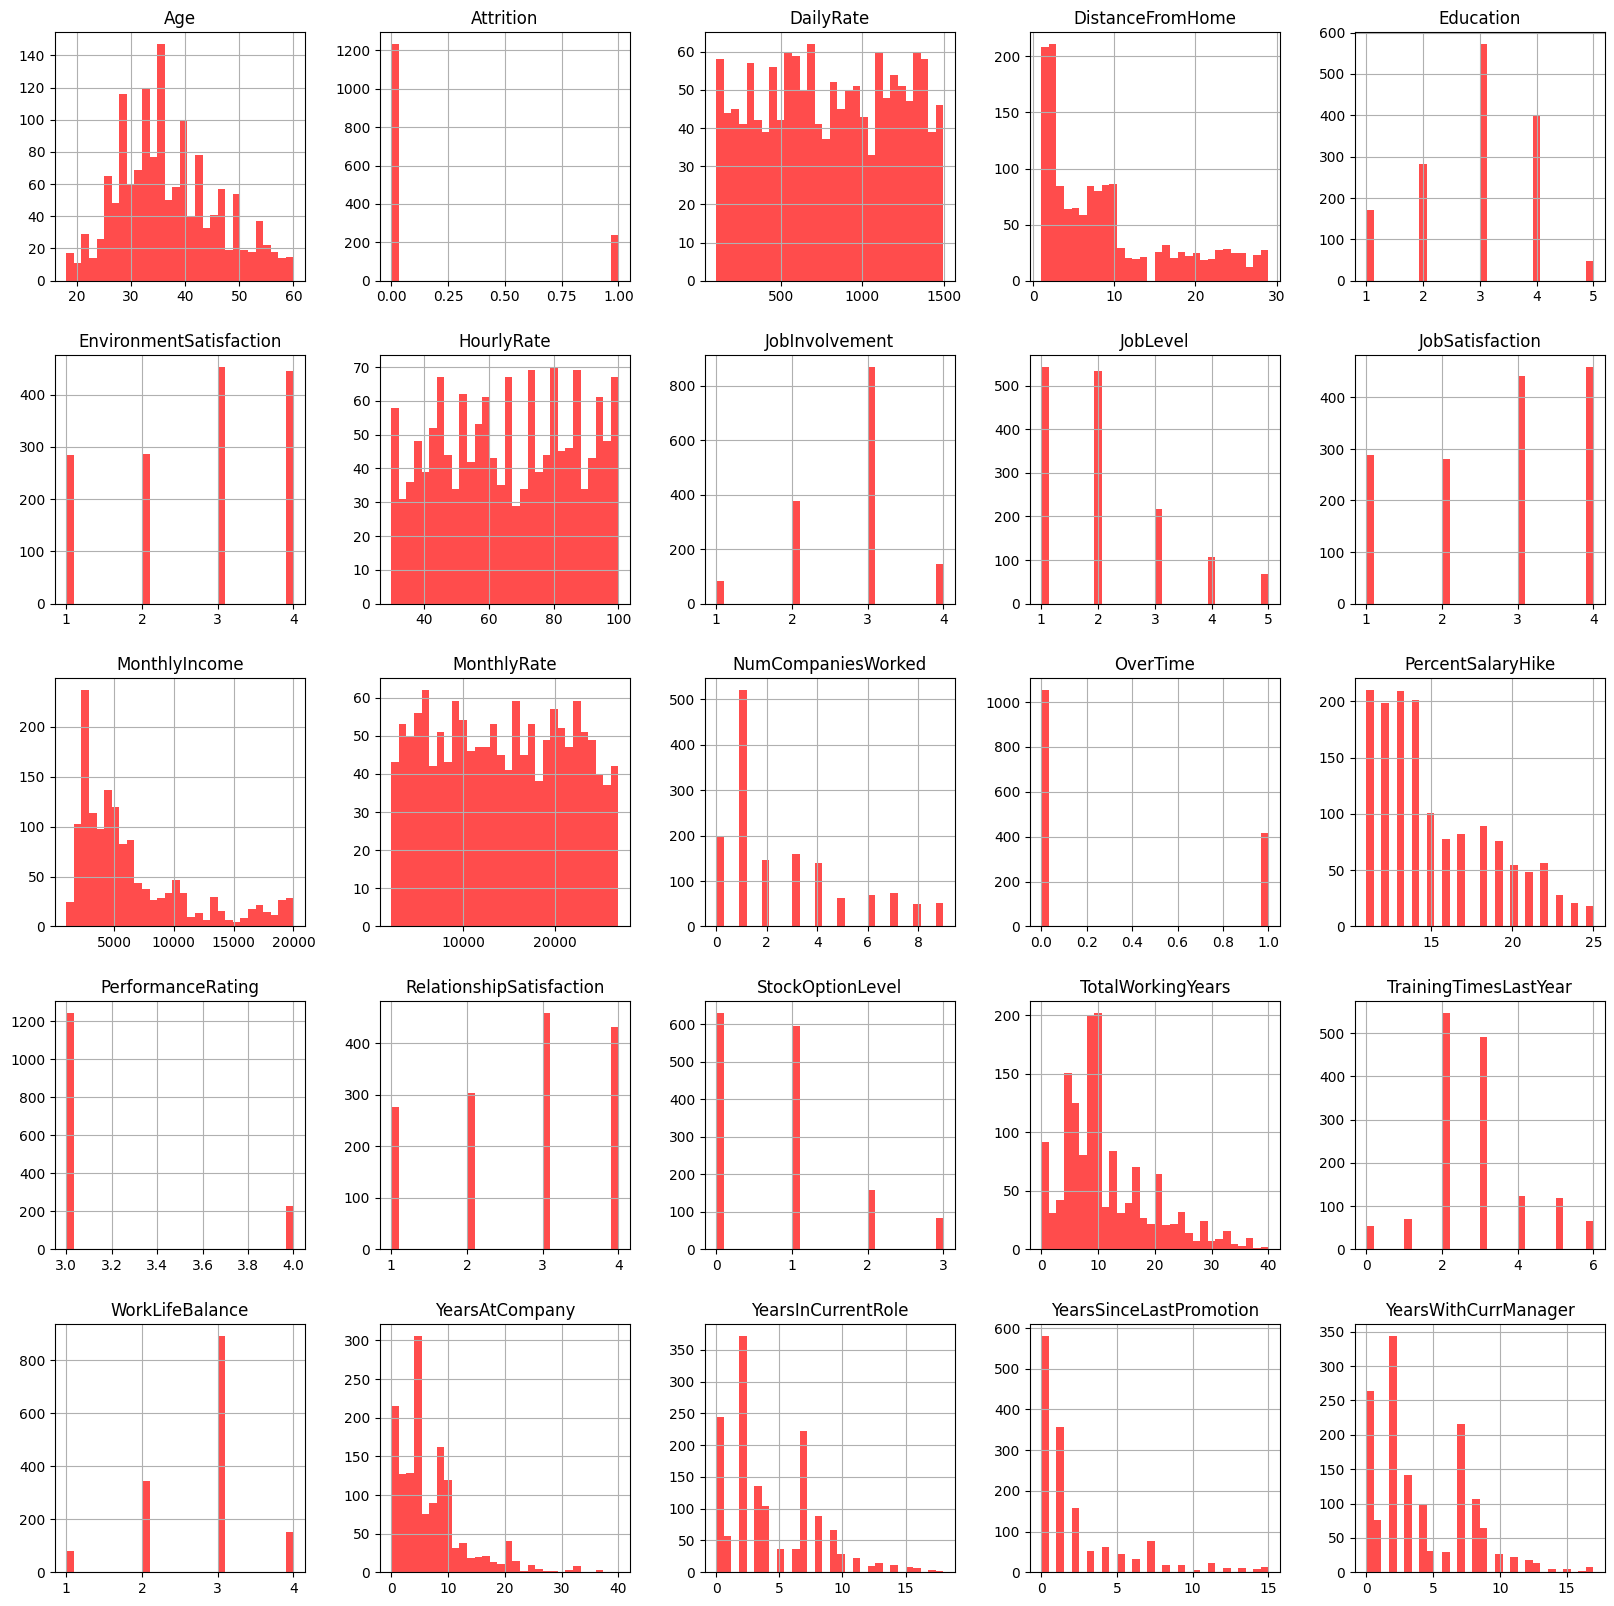

In [9]:
# Our Dataset mostly contains right skewed, uniform or normal distributed features like in the case of Age for example
# Also our dataset is extremely unbalanced having only a little over 200 cases of attrition, so we will be using f1-score as our main metric
df.hist(bins=30, figsize=(20,20), color='r', alpha=0.7)
plt.show()

<a href='#top'>back to top</a>

<a id='feature_correlation'></a>
### 2.2. Feature Correlation

In [10]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


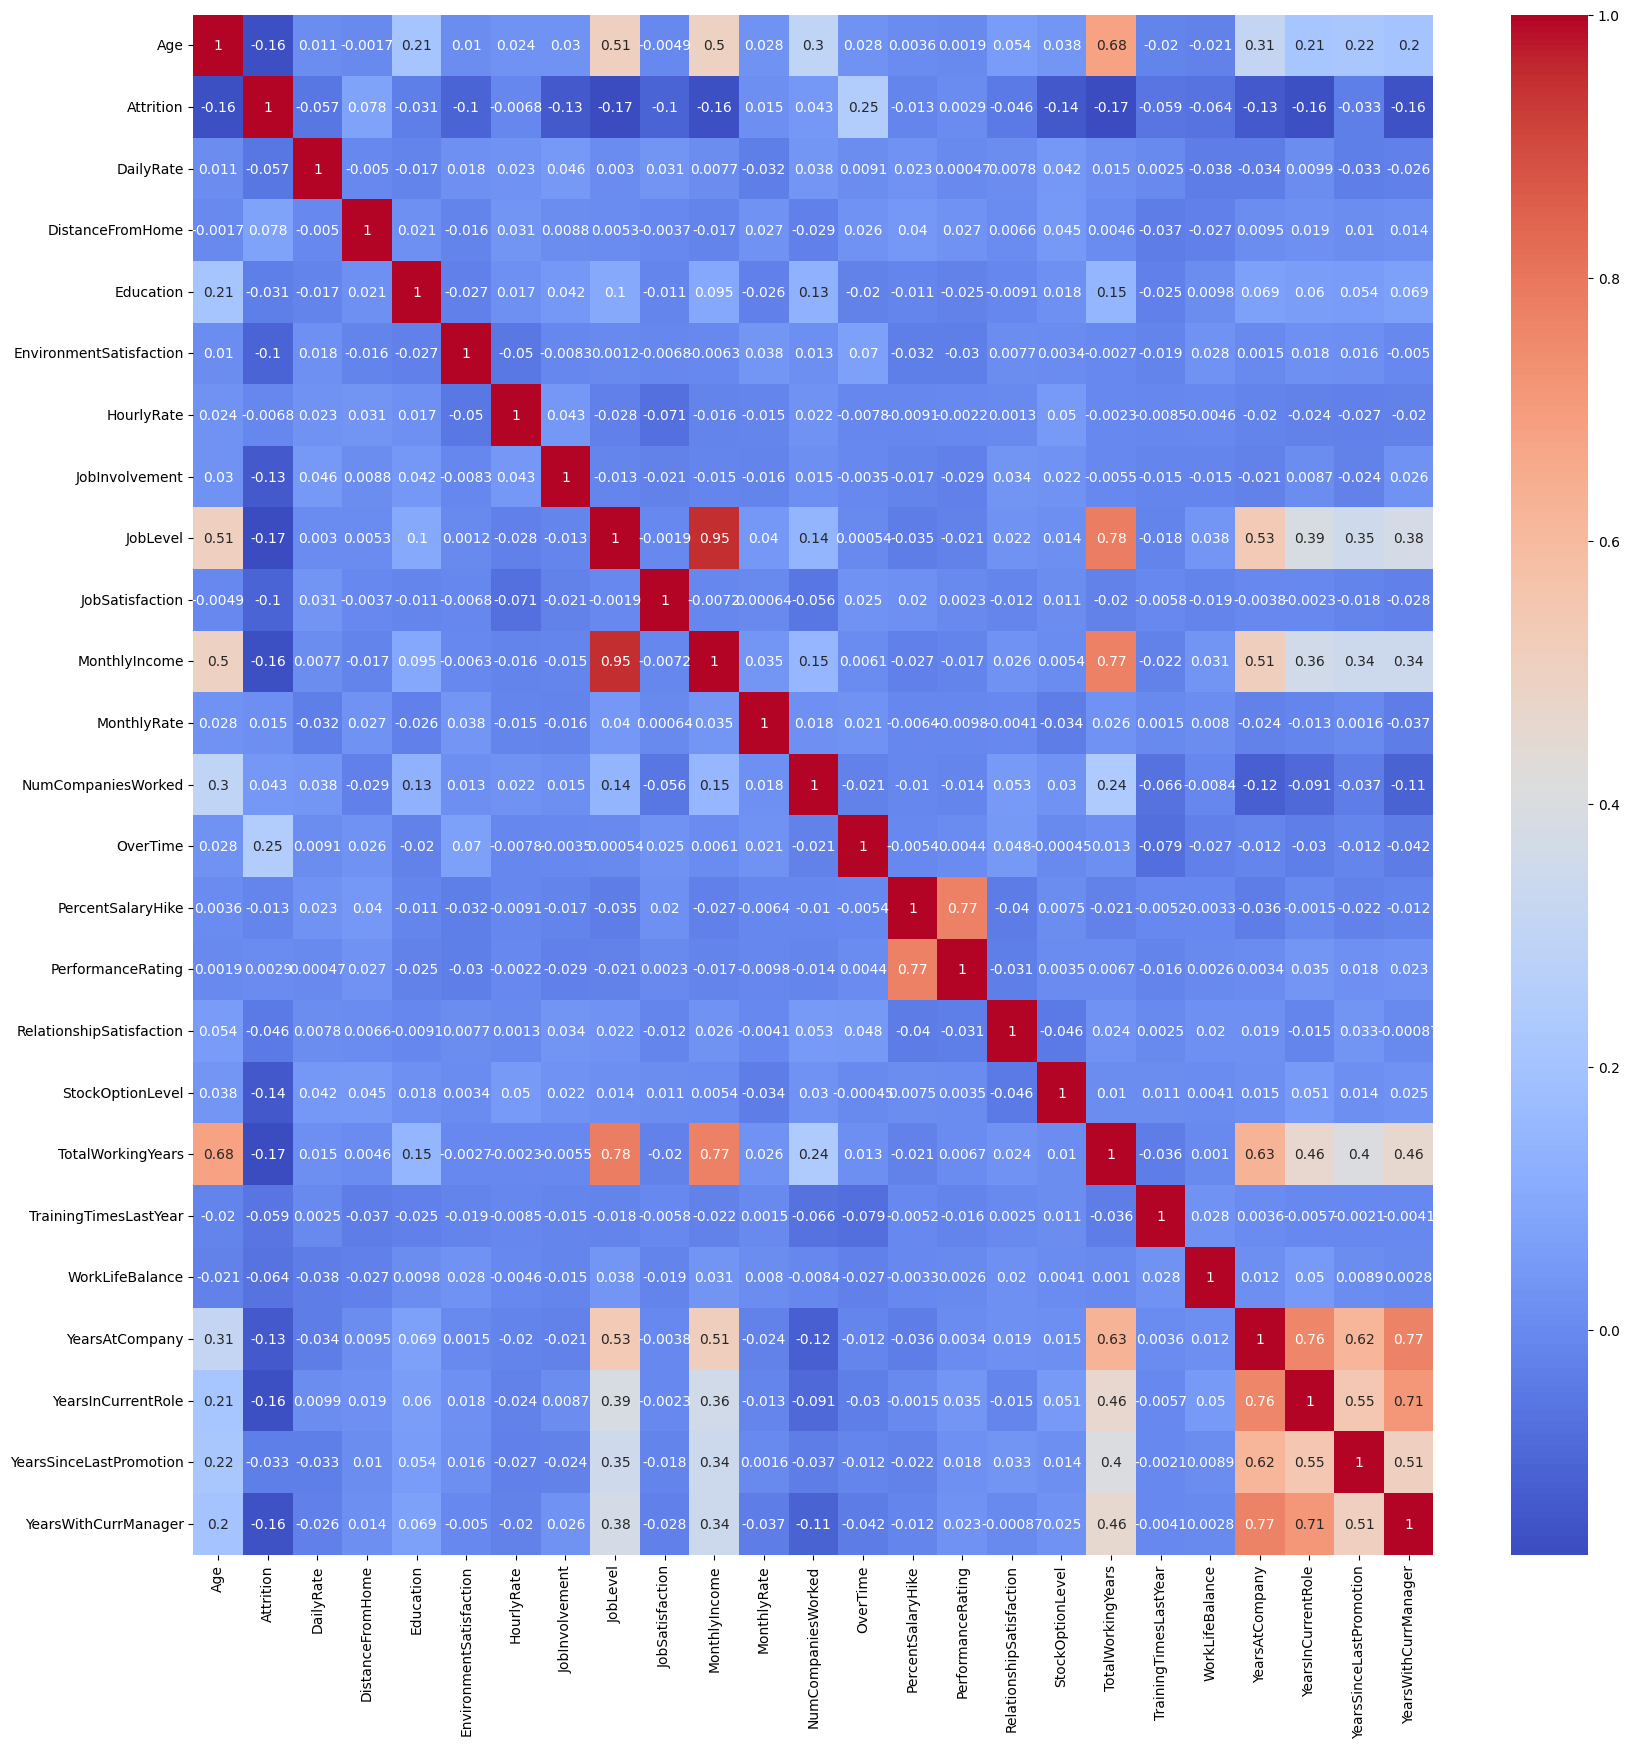

In [11]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot= True)
plt.show()

# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

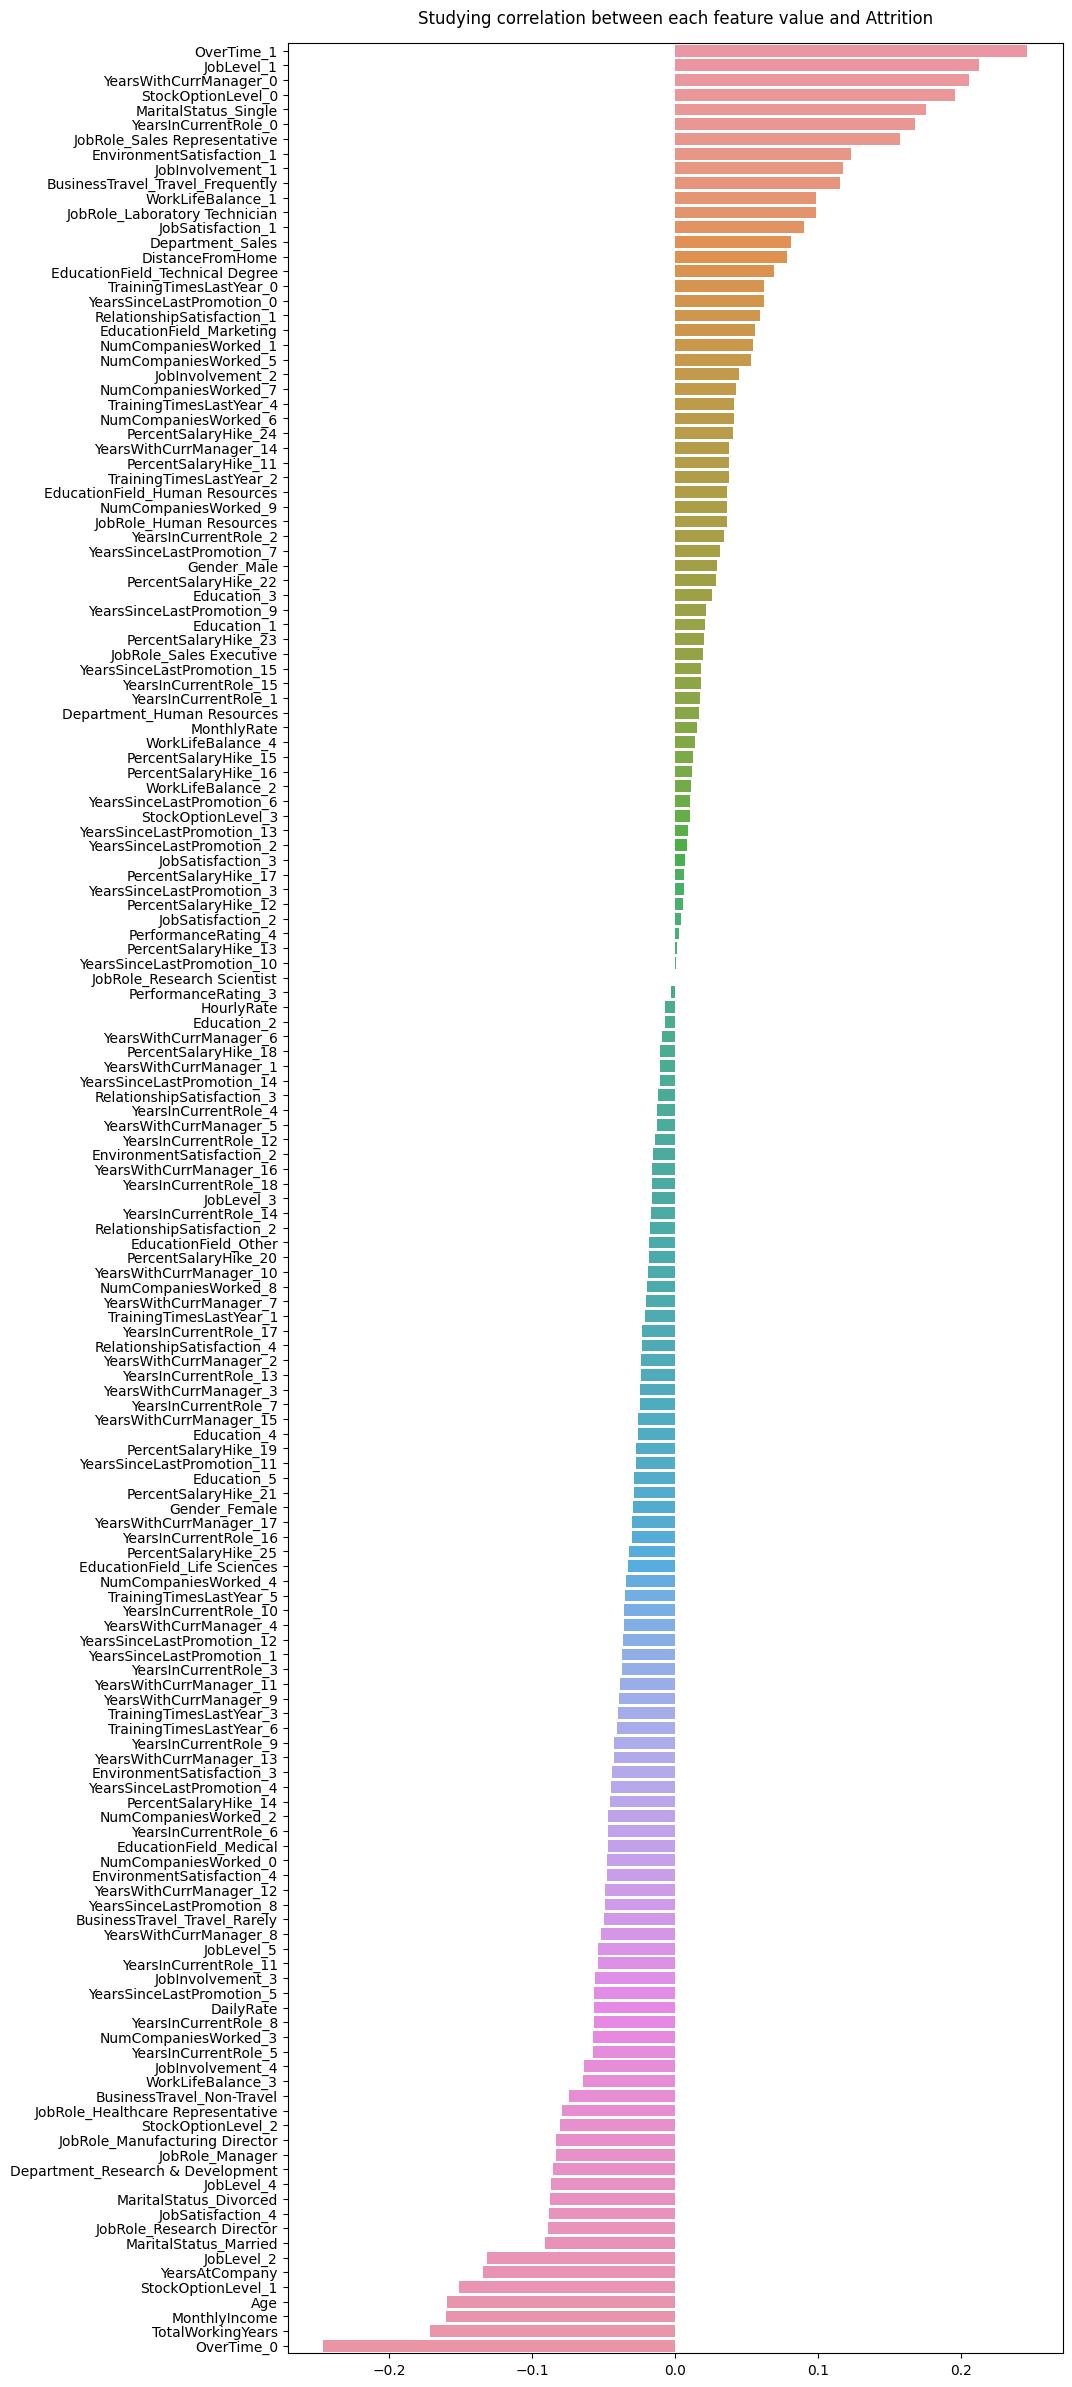

In [12]:
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]

data = pd.get_dummies(df, columns=dummy_col, dtype='uint8')
temp = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values(ascending=False)

plt.figure(figsize= (10,30))
plt.title('Studying correlation between each feature value and Attrition', y= 1.005)
sns.barplot(y= temp.index, x= temp.values)
plt.show()

<a href='#top'>back to top</a>

<a id='feature_analysis'></a>
### 2.3. Understanding Feature Relationships with the Target Variable

In [13]:
# Let's see how many employees left the company! 
left_df = df.query('Attrition == 1')
stayed_df = df.query('Attrition == 0')

In [14]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 

print("Total =", len(df))

print(f"Number of employees who left the company = {len(left_df)}")
print(f"Percentage of employees who left the company = {1.*len(left_df)/len(df):.0%}")
 
print(f"Number of employees who did not leave the company (stayed) = {len(stayed_df)}")
print(f"Percentage of employees who did not leave the company (stayed) = {len(stayed_df)/len(df):.0%}")

Total = 1470
Number of employees who left the company = 237
Percentage of employees who left the company = 16%
Number of employees who did not leave the company (stayed) = 1233
Percentage of employees who did not leave the company (stayed) = 84%


In [15]:
# understand the differences between those who left compared to those who have stayed
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


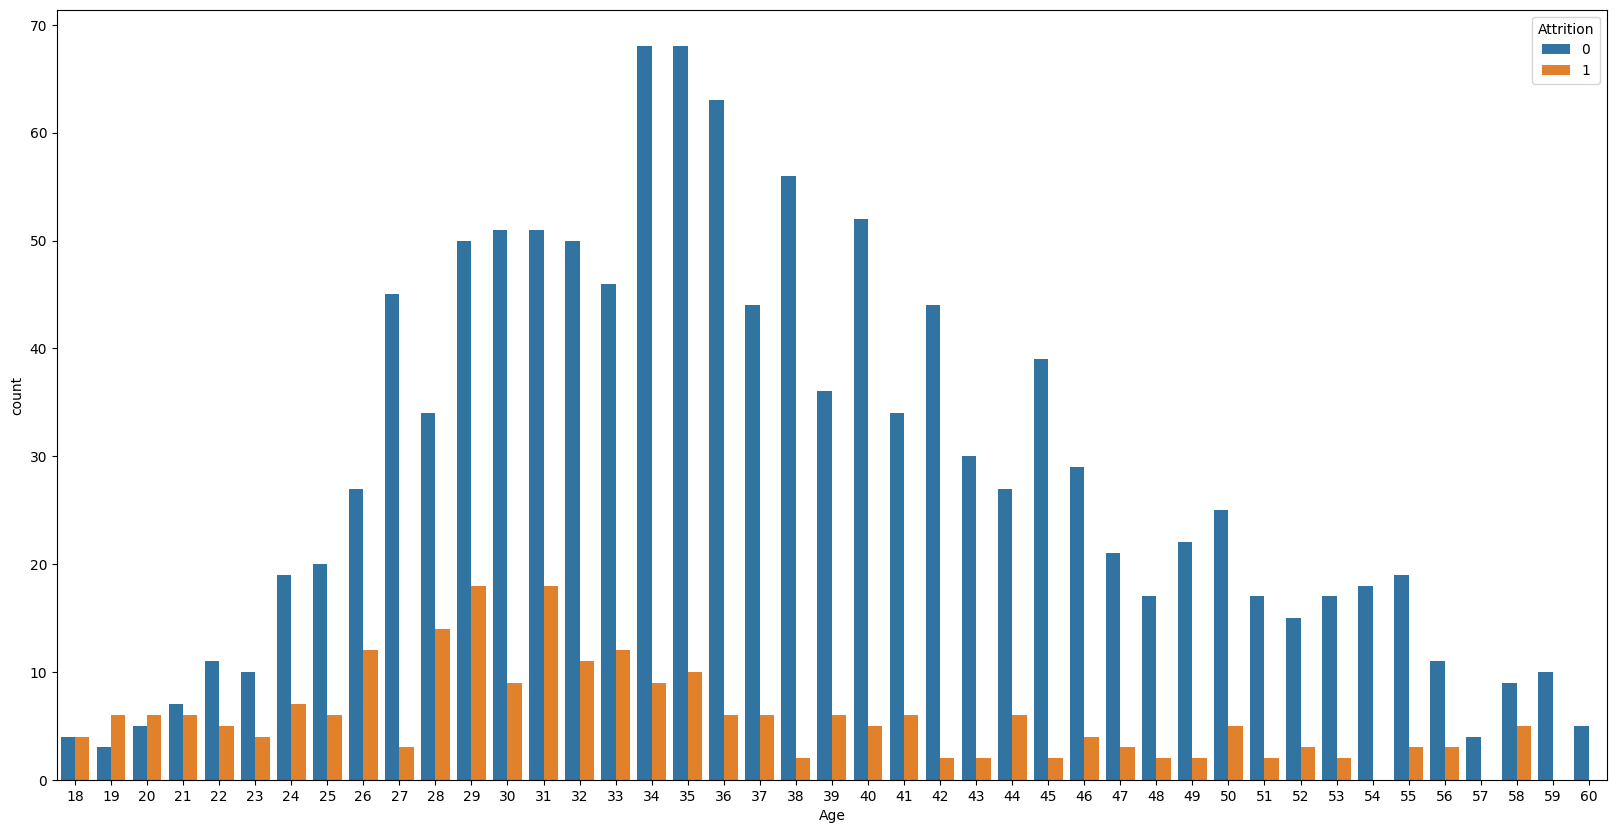

In [17]:
f, ax = plt.subplots(figsize= (20,10))
sns.countplot(x= 'Age', hue= 'Attrition', data=df)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=#006699>💬 Inference:</font></h3>

- Our dataset is quite small but we can see that the older the employee is the less likely he is to leave<br></div>

---

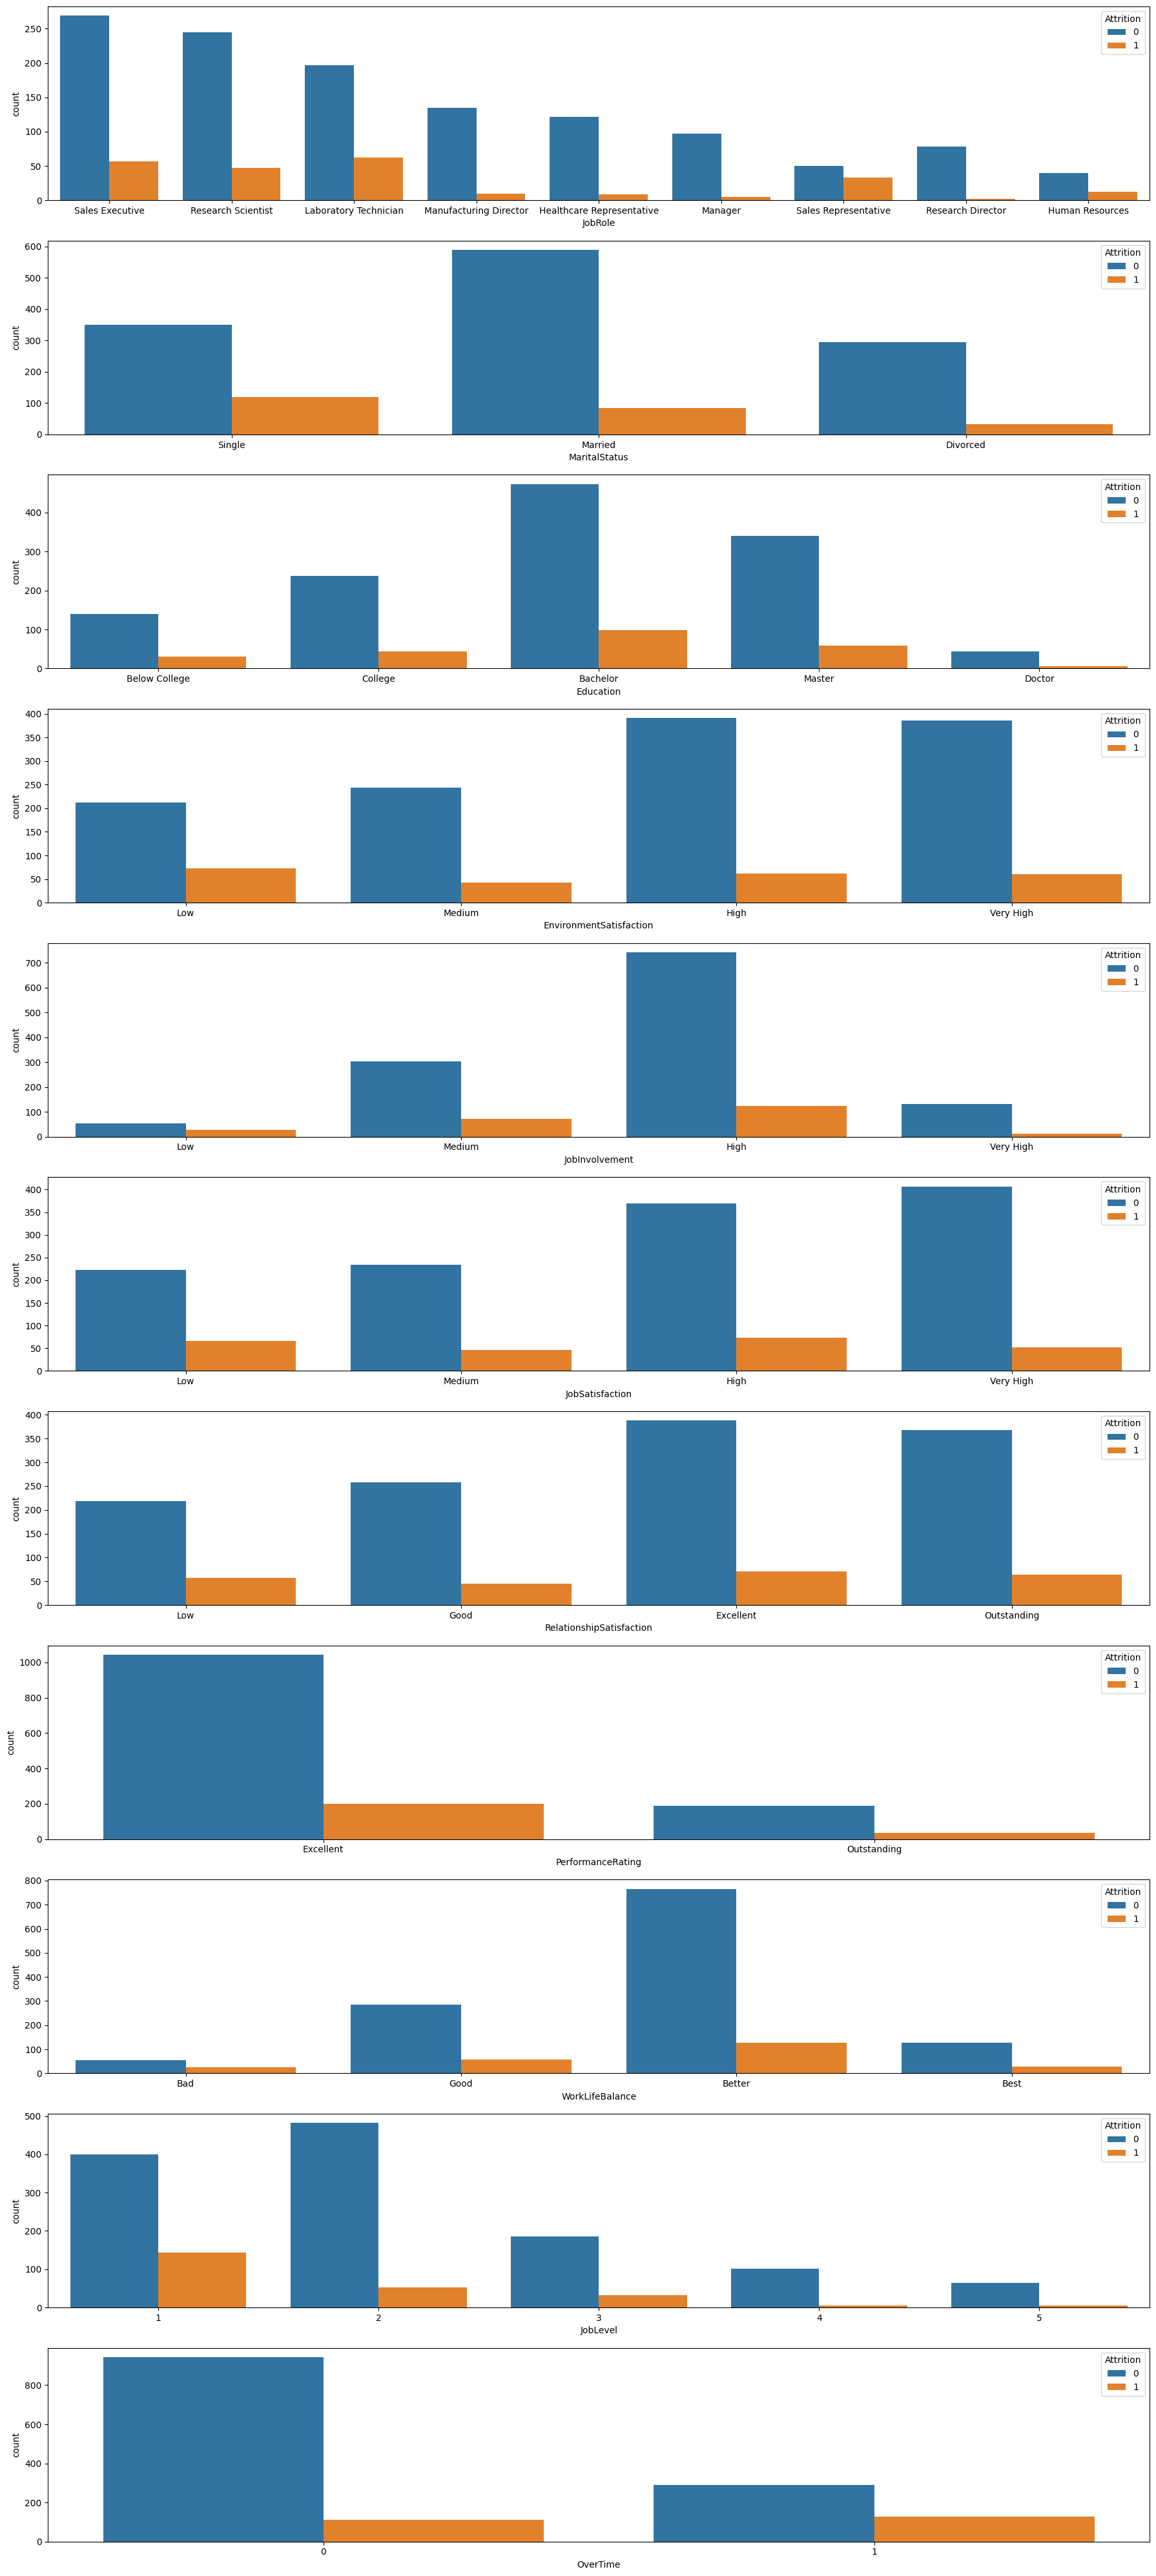

In [18]:
# Analysis on Qualitative features to see if they have an impact on the worker's attrition

ordinal_columns = {'Education' :['Below College', 'College', 'Bachelor', 'Master', 'Doctor'],
 'JobInvolvement': ['Low', 'Medium', 'High', 'Very High'],
 'JobSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
 'EnvironmentSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
 'PerformanceRating': ['Excellent', 'Outstanding'],
 'RelationshipSatisfaction': ['Low', 'Good', 'Excellent', 'Outstanding'],
 'WorkLifeBalance': ['Bad', 'Good', 'Better', 'Best']
 }

fig, ax = plt.subplots(11,1, figsize=(18, 40))

for axis, column in enumerate(['JobRole', 'MaritalStatus', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                               'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance', 'JobLevel', 'OverTime']):
    
    sns.countplot(x = column, hue= 'Attrition', data=df, ax=ax[axis])
    
    if column in ordinal_columns:
        ax[axis].set_xticklabels(ordinal_columns[column])
    else:
        continue

plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=#006699>💬 Inference:</font></h3>

1. JobRole: Sales Representitives tend to leave compared to any other job<br>
2. MaritalStatus: Single employees tend to leave compared to married and divorced<br>
3. Education: Employees with masters tend to leave more than people with phd/bellow college levels<br>
4. EnvironmentSatisfaction: Employees with Low environment satisfaction then to leave the company<br>
5. JobInvolvement: Less involved employees tend to leave the company<br>
6. JobSatisfaction: Employees with Low job satisfaction then to leave the company<br>
7. RelationshipSatisfaction: Employees with Low relationship satisfaction then to leave the company<br>
8. PerformanceRating: Performance rating doesn't seem to have an impact since employees either get Excellent or Outstanding Ratings<br>
9. WorkLifeBalance: Employees with Bad work-life-balance then to leave the company<br>
10. JobLevel: Less experienced (low job level) tend to leave the company<br>
11. OverTime: People that tend to do overtime tend to leave the company more<br></div>

---

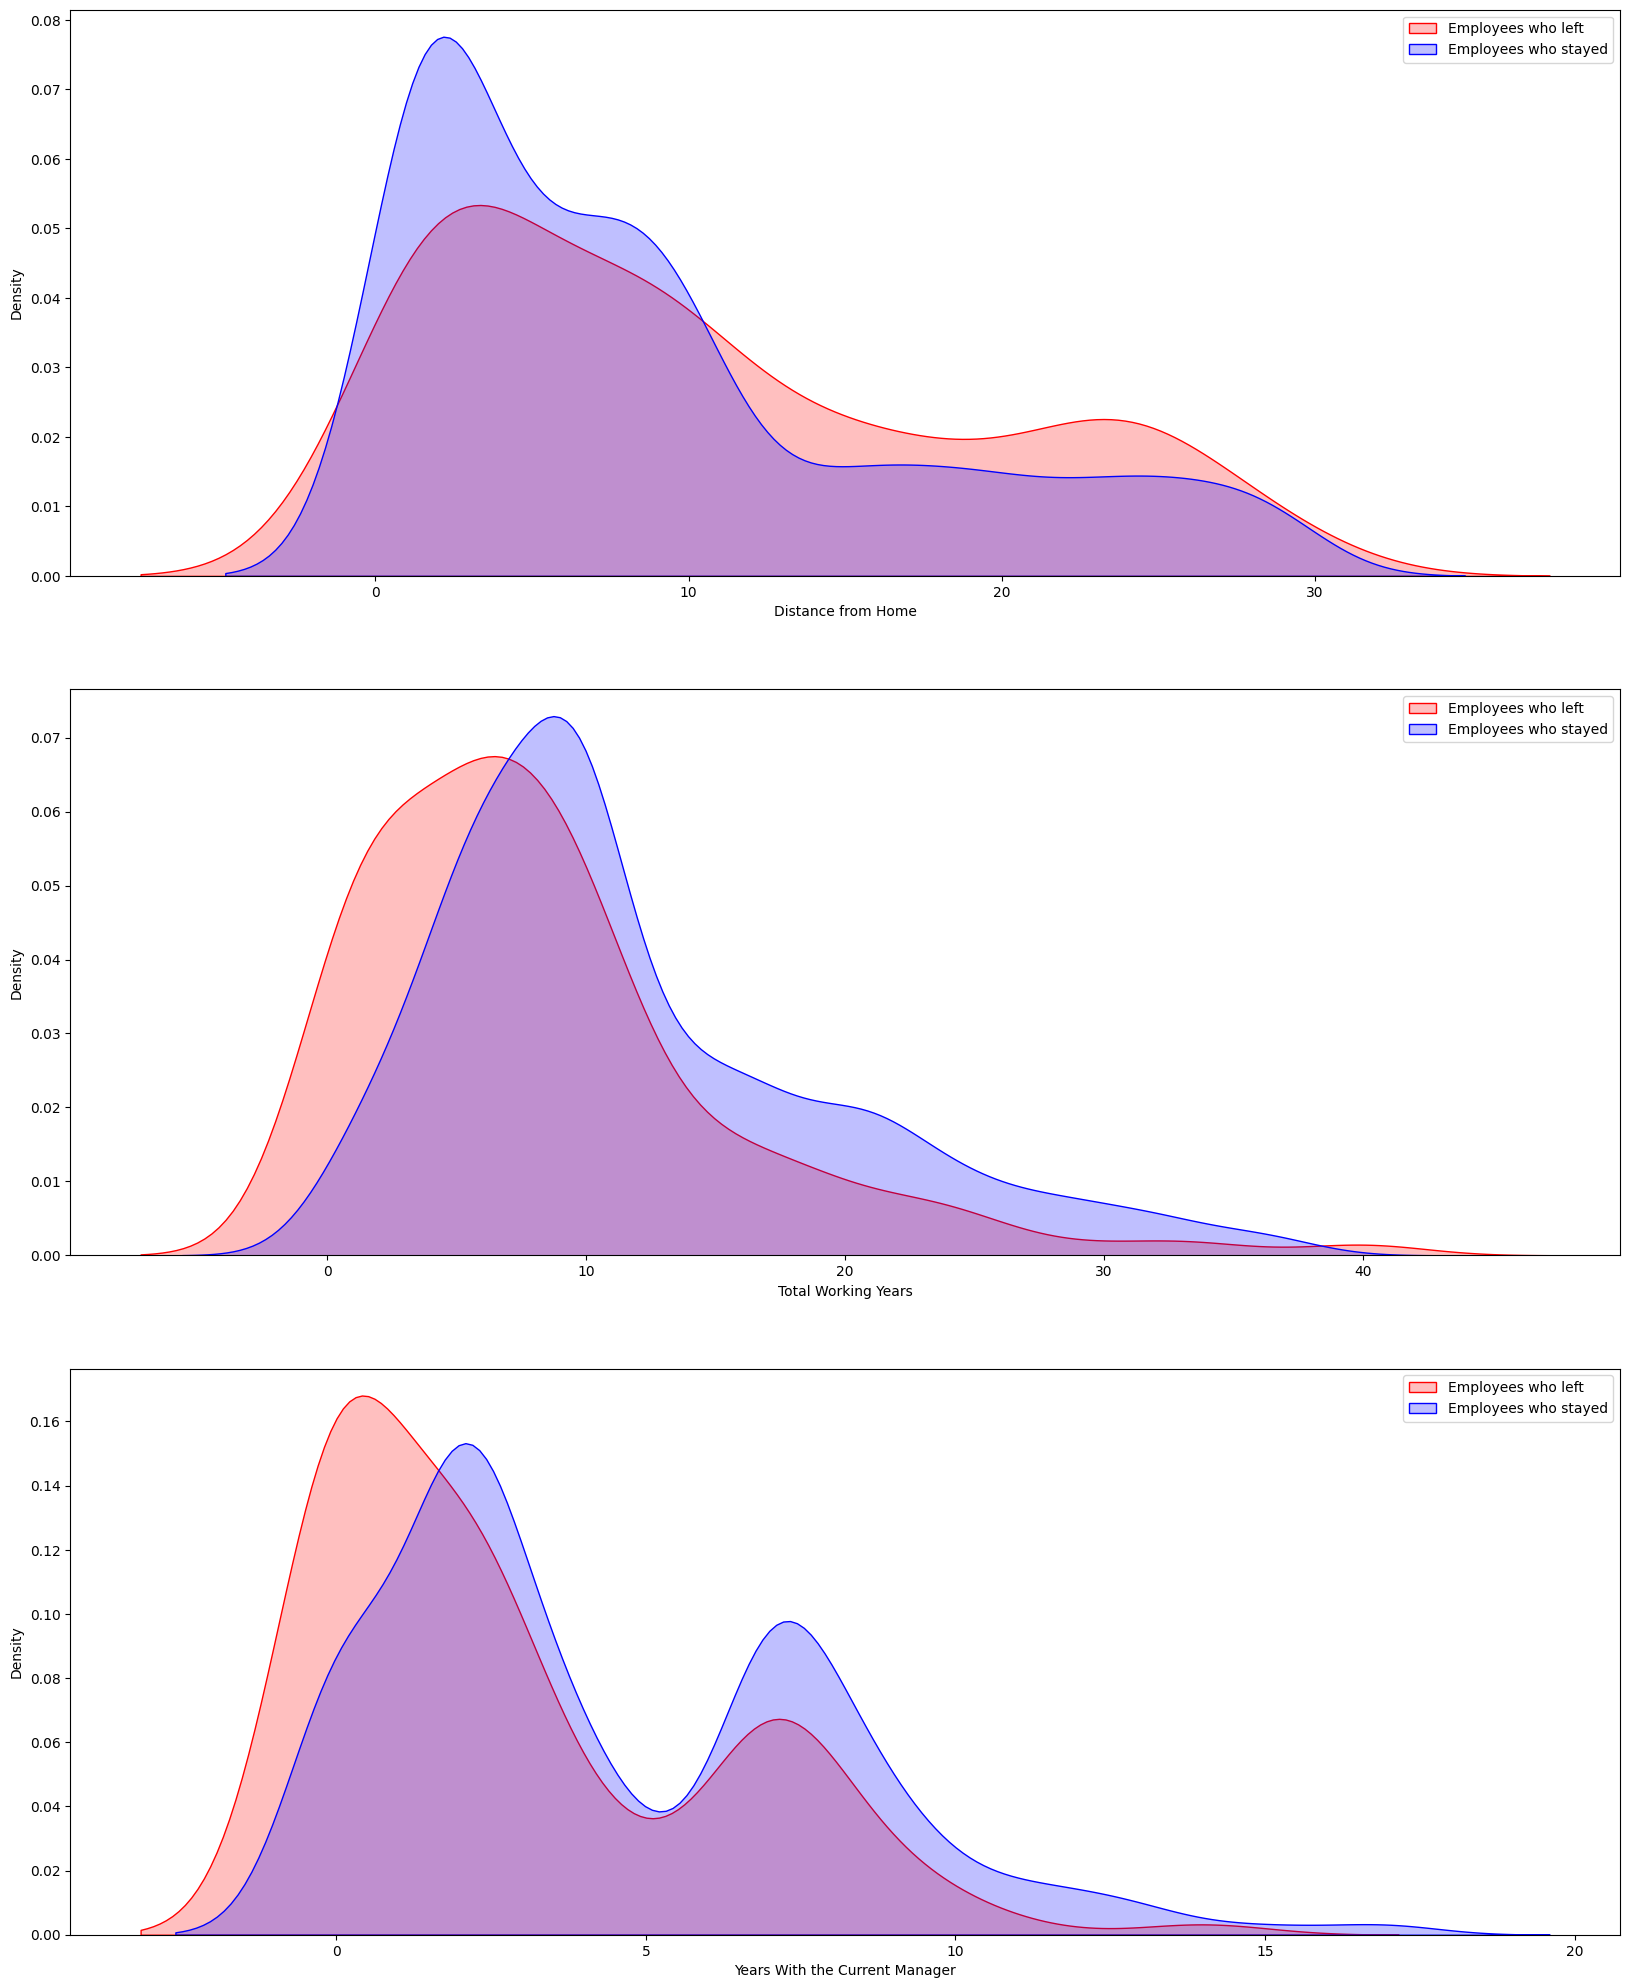

In [54]:
plt.figure(figsize=(20, 25))

plt.subplot(311)
sns.kdeplot(left_df['DistanceFromHome'], label= 'Employees who left', shade = True, color= 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label= 'Employees who stayed', shade = True, color= 'b')
plt.xlabel('Distance from Home')
plt.legend()

plt.subplot(312)
sns.kdeplot(left_df['TotalWorkingYears'], label= 'Employees who left', shade = True, color= 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label= 'Employees who stayed', shade = True, color= 'b')
plt.xlabel('Total Working Years')
plt.legend()

plt.subplot(313)
sns.kdeplot(left_df['YearsWithCurrManager'], label= 'Employees who left', shade = True, color= 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label= 'Employees who stayed', shade = True, color= 'b')
plt.xlabel('Years With the Current Manager')
plt.legend()

plt.show()

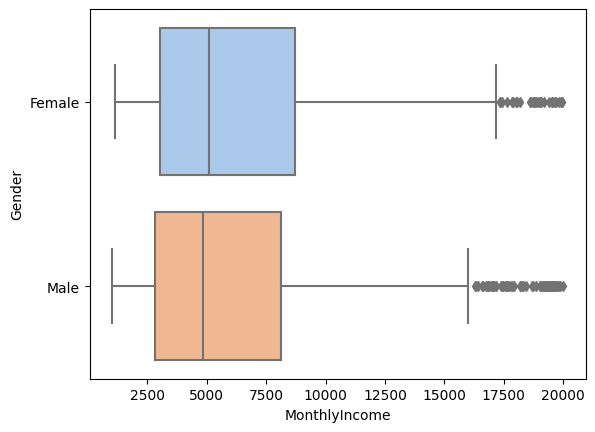

In [22]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome', y= 'Gender', data=df, palette="pastel")
plt.show()

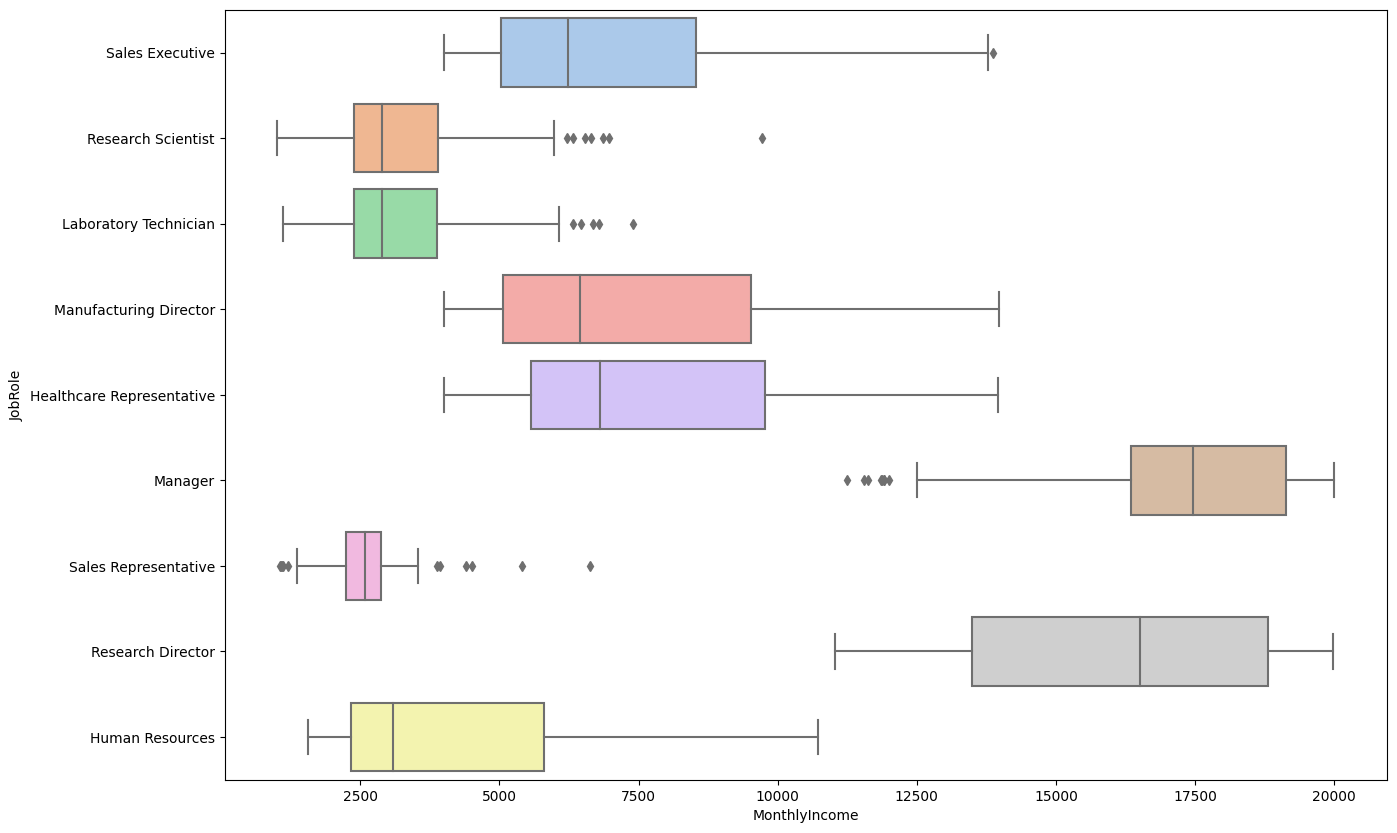

In [23]:
# Let's see the monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y= 'JobRole', data=df, palette="pastel")
plt.show()

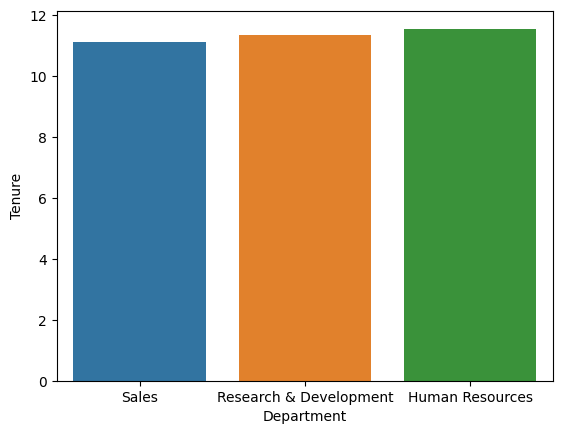

In [24]:
# measuring tenure between each department
sns.barplot(data=df, y= 'TotalWorkingYears', x= 'Department', estimator='mean', ci= None)
plt.ylabel('Tenure')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=#006699>💬 Inference:</font></h3>

- The tenure seems to be averaging around 11 years for all departments<br></div>

---

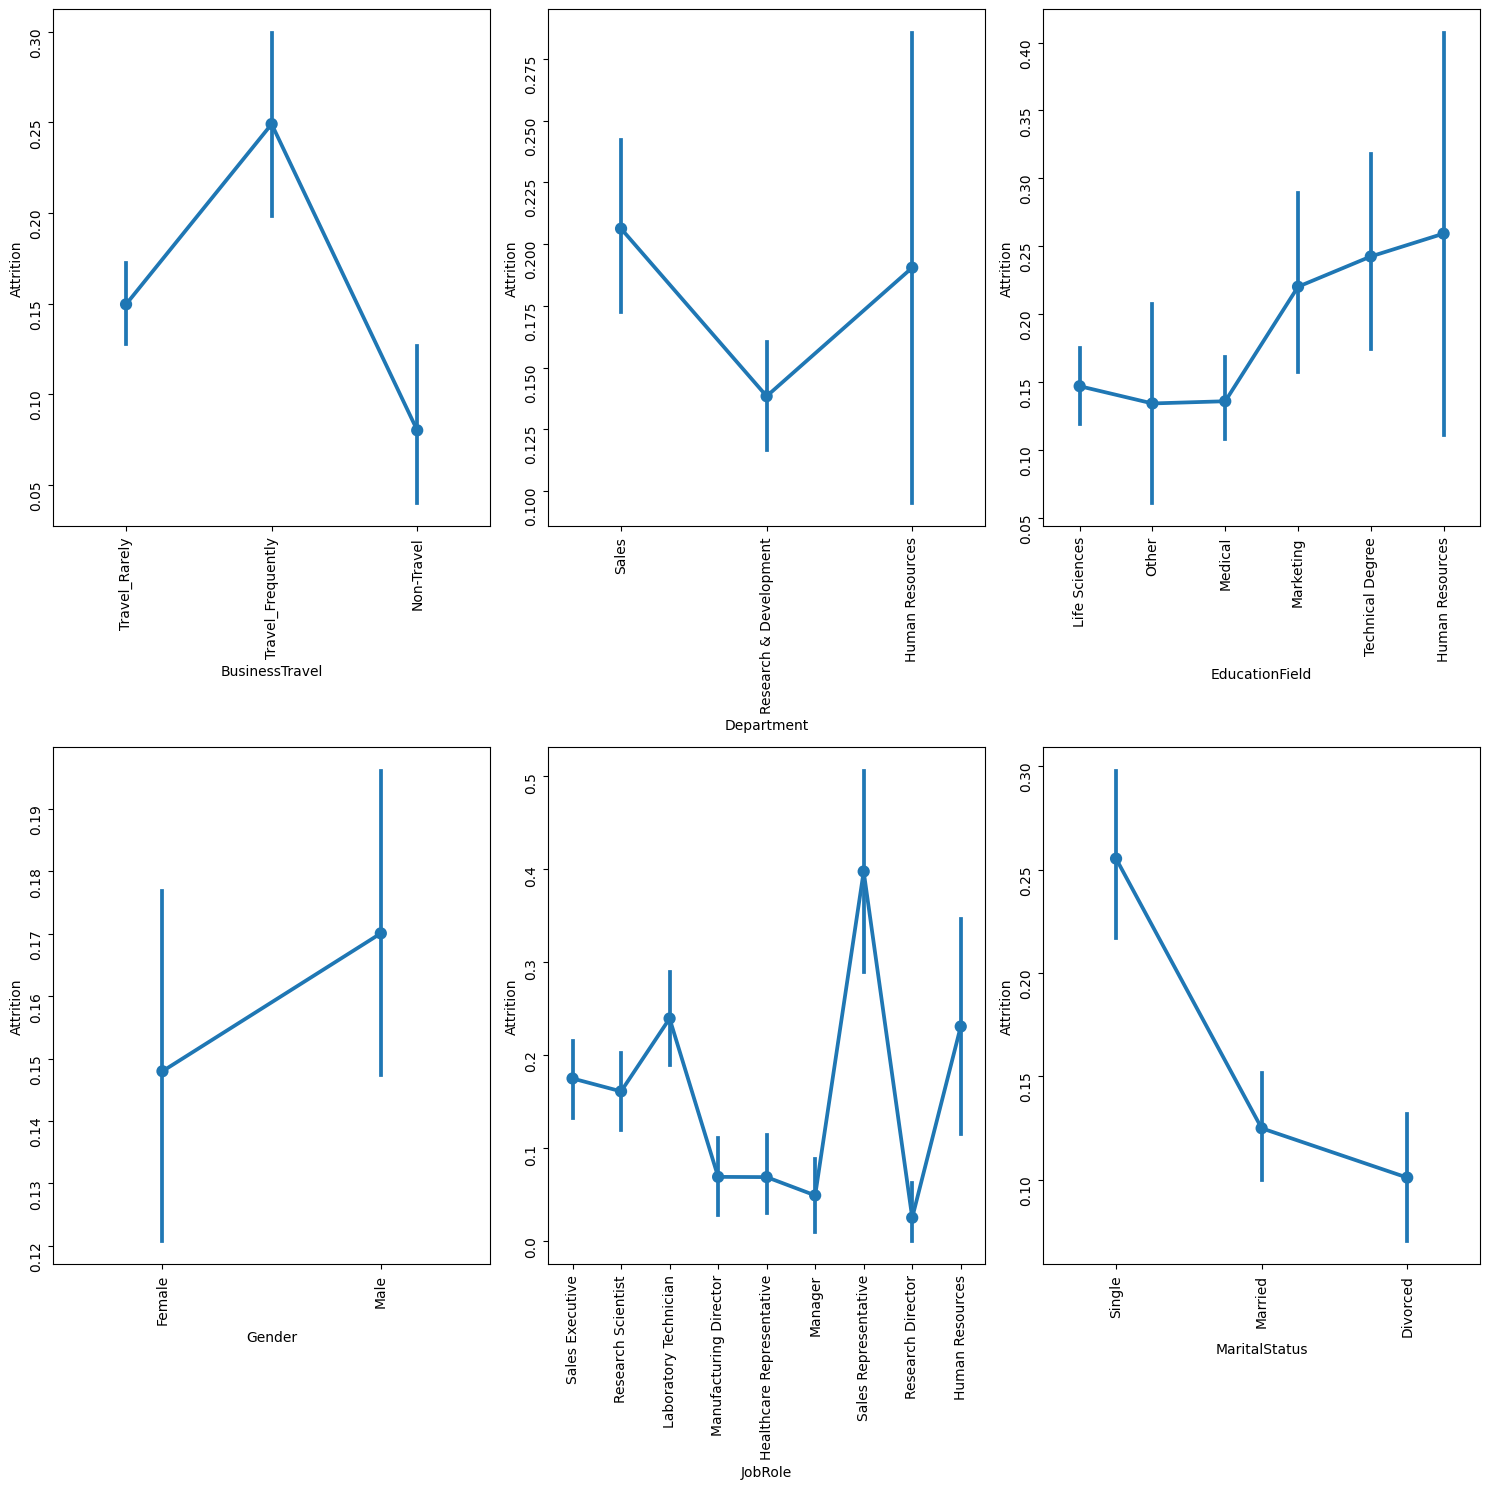

In [41]:
# looking at the target mean for each categorical variable before we encode them

cat_vars = df.select_dtypes('O').columns

fig, axes = plt.subplots(2, 3, figsize= (15, 15))
axes = axes.ravel()

for index, var in enumerate(cat_vars):
    sns.pointplot(x= df[var], y = df['Attrition'], ax=axes[index])
    axes[index].tick_params(labelrotation=90)
    
plt.tight_layout()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=#006699>💬 Inference:</font></h3>

- People that travel_frequently, are single and are from sales (or are sales representatives) tend to have a higher attrition levels<br></div>

---

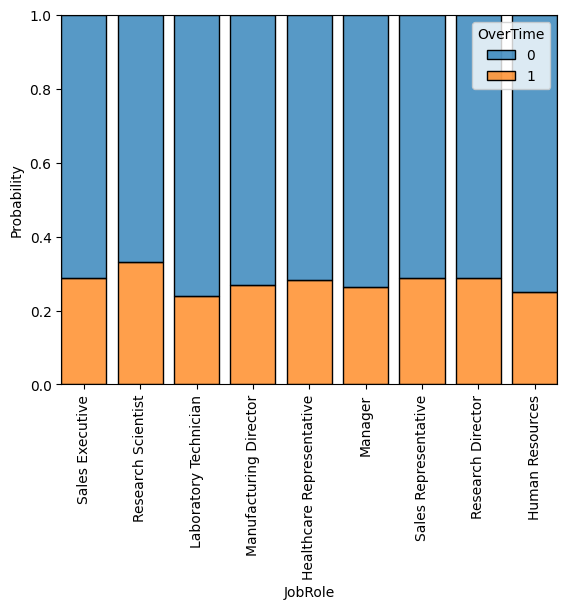

In [40]:
sns.histplot(x = 'JobRole', hue= 'OverTime', data=df, stat="probability", multiple="fill", shrink=.8)
plt.xticks(rotation= 90)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=#006699>💬 Inference:</font></h3>

- Even tho Sales Representatives have a higher attrition level and the feature OverTime is highly correlated with Attrition, their percentage of OverTime doesn't seem to deviate from the norm<br></div>


---

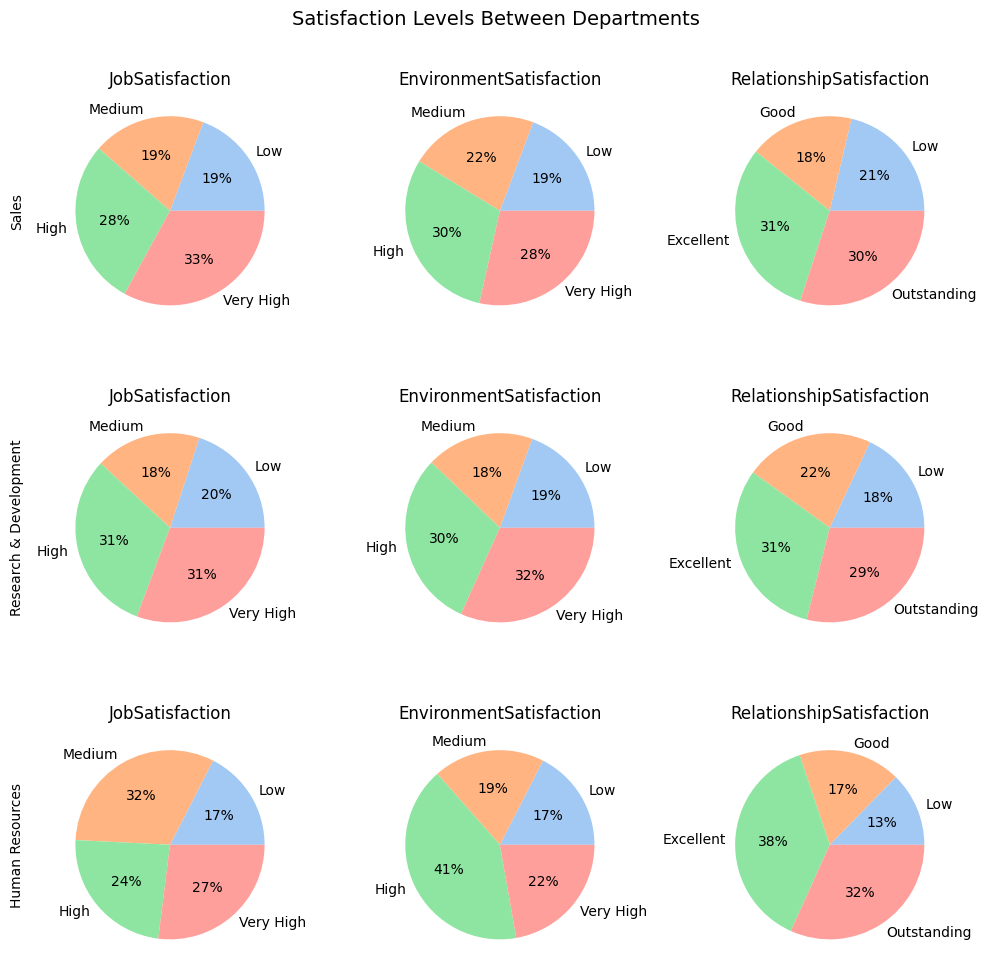

In [26]:
temp = df.copy()

ordinal_columns = (
 #('JobInvolvement', {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}),
 ('JobSatisfaction', {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}),
 ('EnvironmentSatisfaction', {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}),
 ('RelationshipSatisfaction', {1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'}),
 #('WorkLifeBalance', {1:'Bad', 2:'Good', 3:'Better', 4:'Best'})
 )

# if JobRole change figsize=(10,30)
partition = 'Department'

for col, mappings in ordinal_columns:
    temp[col] = temp[col].map(mappings)
    

fig, axes = plt.subplots(temp[partition].nunique(), len(ordinal_columns), figsize=(10,10))
axes = axes.ravel()

fig.suptitle(f'Satisfaction Levels Between {partition}s', y= 0.99, fontsize= 14) 
n=0
for fil in df[partition].unique():
    axes[n].set_ylabel(fil, labelpad=20)
    for col, mappings in ordinal_columns:
        _ = temp[temp[partition] == fil][col].value_counts(normalize= True)
        _ = _.reindex(list(mappings.values()))
        axes[n].pie(_.values, labels= _.index, colors= sns.color_palette('pastel') , autopct='%.0f%%')
        axes[n].set_title(col)
        n +=1
 
plt.tight_layout()   

In [27]:
# Analysing the existance of Rare Labels in our categorical variables or ordinal variables
# We don't seem to have any Rare labels

temp = df.nunique().sort_values(ascending=True)
vars_ = temp[(temp > 2) & (temp < 15)].index
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df[var].value_counts(normalize=True)
    return tmp[tmp < rare_perc]

for var in vars_:
    display(analyse_rare_labels(df, var, 0.01))

Series([], Name: MaritalStatus, dtype: float64)

Series([], Name: BusinessTravel, dtype: float64)

Series([], Name: Department, dtype: float64)

Series([], Name: RelationshipSatisfaction, dtype: float64)

Series([], Name: JobSatisfaction, dtype: float64)

Series([], Name: JobInvolvement, dtype: float64)

Series([], Name: StockOptionLevel, dtype: float64)

Series([], Name: WorkLifeBalance, dtype: float64)

Series([], Name: EnvironmentSatisfaction, dtype: float64)

Series([], Name: JobLevel, dtype: float64)

Series([], Name: Education, dtype: float64)

Series([], Name: EducationField, dtype: float64)

Series([], Name: TrainingTimesLastYear, dtype: float64)

Series([], Name: JobRole, dtype: float64)

Series([], Name: NumCompaniesWorked, dtype: float64)

<a href='#top'>back to top</a>

<a id='feature-pre'></a>
## 3. Feature Preprocessing

In [28]:
# we will target encode them in order to prevent curse of dimensionality even if we dummify them by droping the first category 
# we are still going to be adding 20 features
from feature_engine.encoding import OrdinalEncoder

encoder = OrdinalEncoder(encoding_method='ordered', variables = cat_vars.to_list())
df_encoded = encoder.fit_transform(df, df['Attrition'])
df_encoded

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,2,2,0,94,3,2,5,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,0,8,1,2,3,1,61,2,2,4,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,0,2,2,0,4,1,92,2,1,7,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,0,3,4,2,4,0,56,3,1,4,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,0,2,1,1,1,1,40,3,1,7,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,0,23,2,1,3,1,41,4,2,7,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,1,613,0,6,1,1,4,1,42,2,3,2,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,1,155,0,4,3,2,2,1,87,4,2,3,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,2,1023,2,2,3,1,4,1,63,2,2,5,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [29]:
X = df_encoded.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
X_train.shape, X_test.shape

((1102, 30), (368, 30))

In [34]:
y_train.shape, y_test.shape

((1102,), (368,))

In [35]:
# Normalizing our dataset so it improve the performance of the model and it reduces the risk of overfitting

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= scaler.get_feature_names_out())

In [36]:
X_train_scaled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.238095,0.0,0.984218,0.0,0.000000,0.50,0.4,0.666667,0.0,0.357143,0.000000,0.25,0.875,1.000000,0.5,0.298315,0.574102,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.250,1.000000,0.666667,0.225,0.444444,0.466667,0.294118
1,0.309524,0.5,0.840746,0.0,0.035714,0.00,0.2,1.000000,0.0,0.414286,0.000000,0.00,0.875,1.000000,0.0,0.006319,0.620036,0.111111,1.0,0.000000,0.0,0.666667,1.000000,0.025,0.666667,0.666667,0.025,0.000000,0.000000,0.000000
2,0.738095,0.5,0.994261,0.0,0.214286,0.75,0.4,0.666667,1.0,0.071429,0.666667,0.50,0.250,0.333333,0.0,0.497999,0.757037,0.333333,0.0,0.214286,0.0,0.333333,0.666667,0.725,0.500000,0.666667,0.200,0.388889,0.000000,0.411765
3,0.428571,1.0,0.859397,0.0,0.178571,0.75,0.4,0.000000,1.0,0.714286,1.000000,0.25,0.875,0.000000,0.5,0.239758,0.707368,0.333333,1.0,0.142857,0.0,1.000000,0.333333,0.225,0.500000,0.666667,0.075,0.111111,0.000000,0.117647
4,0.238095,0.0,0.126255,0.5,0.000000,0.25,0.4,0.666667,1.0,0.185714,0.666667,0.00,0.750,1.000000,0.0,0.089363,0.337282,0.111111,0.0,0.285714,0.0,0.333333,0.333333,0.075,0.333333,0.666667,0.075,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.380952,0.5,0.881636,1.0,0.321429,0.75,0.4,0.666667,0.0,0.814286,0.666667,0.00,1.000,0.666667,0.5,0.063770,0.655129,0.111111,1.0,0.571429,0.0,1.000000,0.333333,0.025,0.333333,0.666667,0.025,0.055556,0.000000,0.000000
1098,0.404762,0.5,0.304161,0.5,0.250000,0.75,0.8,0.666667,1.0,1.000000,0.666667,0.00,0.750,0.666667,1.0,0.174513,0.201325,0.111111,0.0,0.428571,0.0,0.333333,0.000000,0.150,0.333333,0.000000,0.125,0.222222,0.066667,0.235294
1099,0.595238,0.5,0.771162,1.0,0.035714,0.50,0.2,1.000000,1.0,0.614286,0.666667,0.25,0.625,1.000000,0.5,0.360084,0.159607,0.111111,1.0,0.428571,0.0,0.000000,0.333333,0.250,0.500000,0.666667,0.250,0.500000,0.533333,0.470588
1100,0.476190,0.5,0.117647,0.0,0.035714,1.00,0.2,1.000000,1.0,0.885714,0.666667,0.00,0.500,0.666667,0.5,0.107846,0.737884,0.666667,1.0,0.142857,0.0,0.333333,0.333333,0.150,0.000000,0.000000,0.025,0.000000,0.000000,0.058824


<a href='#top'>back to top</a>

<a id='ML'></a>
## 4. Model Training and Evaluation

<a id='model_training'></a>
### 4.1 Model Training

In [407]:
models = [(LogisticRegression(random_state= 0), "LR"), 
          (CalibratedClassifierCV(LinearSVC(random_state= 0)), "SVC"), 
          (RandomForestClassifier(random_state= 0 ,n_jobs= -1), "RF"), 
          (XGBClassifier(), "XGBoost")
          ]

In [410]:
metrics = defaultdict(dict)
cwd = Path.cwd()
sub_path = "models"

for model, model_name in models:

  print(f'Starting {model_name}')

  start = time.time()
  model.fit(X_train_scaled, y_train)
  end = time.time()

  seconds = round(end - start)
  print(f'finished {model_name} training in {seconds // 60:02d}:{seconds%60:02d}\n')

  print("Saving model ...")
  sample_dir = cwd / sub_path
  sample_dir.mkdir(parents=True, exist_ok=True)
  output = os.path.join(sample_dir, model_name + ".joblib")
  joblib.dump(model, output)
  print("Computing metrics ...\n")

  size = os.stat(output).st_size / (1024 * 1024)

  pred_prob = model.predict_proba(X_test_scaled)
  y_pred = pred_prob.argmax(axis=1)
  fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
  metrics[model_name] = {'Accuracy': accuracy_score(y_test, y_pred), 
                  'Precision': precision_score(y_test, y_pred),
                  'Recall': recall_score(y_test, y_pred),
                  'F1 score': f1_score(y_test, y_pred),
                  'fpr': fpr,
                  'tpr': tpr,
                  'y_pred': y_pred,
                  'pred_proba': pred_prob,
                  'thresholds': thresholds,
                  'AOC Score': auc(fpr, tpr),
                  'Time Taken': seconds,
                  'Model Path': output,
                  'Size in MB': size
                  }
  
joblib.dump(dict(metrics), cwd / sub_path / "metrics.joblib")

Starting LR
finished LR training in 00:00

Saving model ...
Computing metrics ...

Starting SVC
finished SVC training in 00:00

Saving model ...
Computing metrics ...

Starting RF
finished RF training in 00:00

Saving model ...
Computing metrics ...

Starting XGBoost
finished XGBoost training in 00:00

Saving model ...
Computing metrics ...



['/Users/goncalomoura/Documents/Data_science/Portfolio/HR/models/metrics.joblib']

<a href='#top'>back to top</a>

<a id='model_evaluation'></a>
### 4.2 Model Evaluation

In [56]:
print(f'Accuracy of our model if we labelled everything with no Attrtion: {accuracy_score(y_test, [0]*len(y_test)):.0%}')

Accuracy of our model if we labelled everything with no Attrtion: 84%


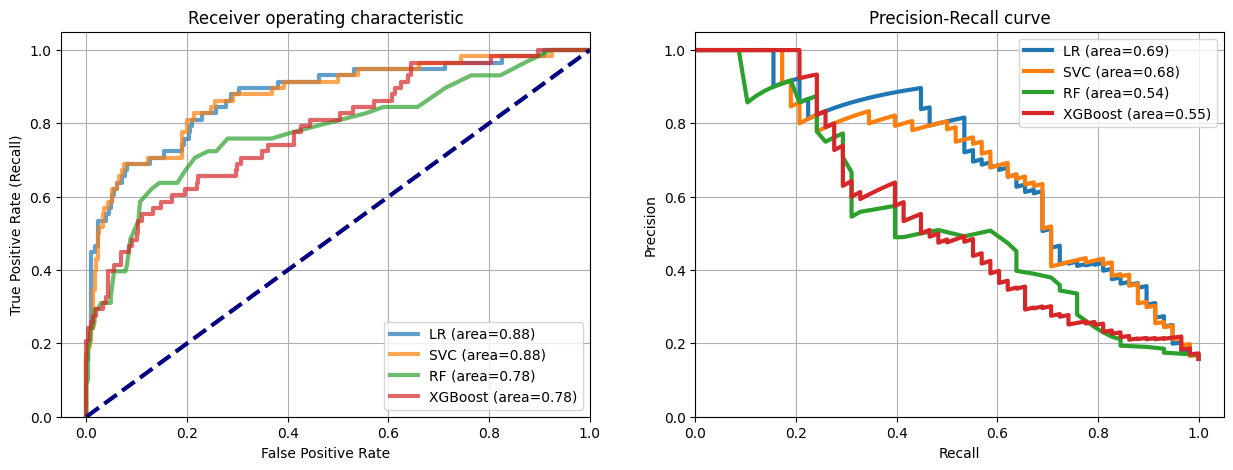

In [244]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (15,5))

## Plot roc
for name, info in metrics.items():
    ax[0].plot(info['fpr'], info['tpr'], lw=3 , alpha= .7, label='{0} (area={1:0.2f})'.format(name, round(info['AOC Score'], 2)))
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate',
            ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for name, info in metrics.items():
    precision, recall, thresholds = precision_recall_curve(y_test, info['pred_proba'][:,1])
    ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(name, auc(recall, precision)))
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [40]:
# Suprisingly LR obtained one of the better f1_scores
lst = []
for models in metrics.keys():
    _ = {key: value for key, value in metrics[models].items() if key not in ['y_pred', 'fpr', 'tpr', 'thresholds', 'Model Path', 'pred_proba']}
    _.update({"model": models})
    lst.append(_)

metrics_table = pd.DataFrame(lst).set_index('model')
metrics_table

,Accuracy,Precision,Recall,F1 score,AOC Score,Time Taken,Size in MB
model,,,,,,,
LR,0.902174,0.892857,0.431034,0.581395,0.875195,0,0.001922
SVC,0.883152,0.826087,0.327586,0.469136,0.875028,0,0.009046
RF,0.869565,0.916667,0.189655,0.314286,0.780395,0,1.814126
XGBoost,0.861413,0.620690,0.310345,0.413793,0.783704,0,0.179710


Threshold of the intersection: 0.34


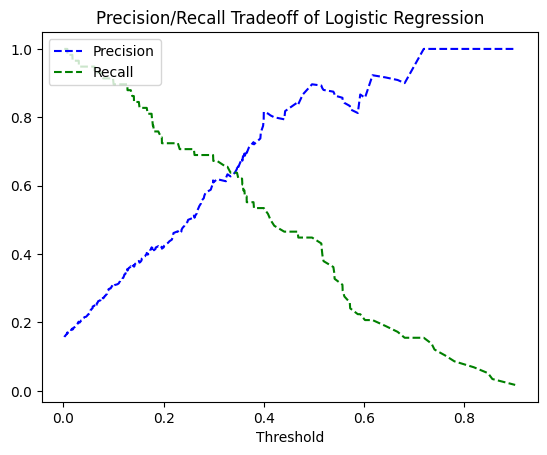

In [511]:
# let's visualize the Precision/Recall Tradeoff of Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, metrics['LR']['pred_proba'][:,1])
print('Threshold of the intersection:', thresholds[list(precision == recall).index(True)].round(2))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision/Recall Tradeoff of Logistic Regression")
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       310
           1       0.64      0.64      0.64        58

    accuracy                           0.89       368
   macro avg       0.79      0.79      0.79       368
weighted avg       0.89      0.89      0.89       368



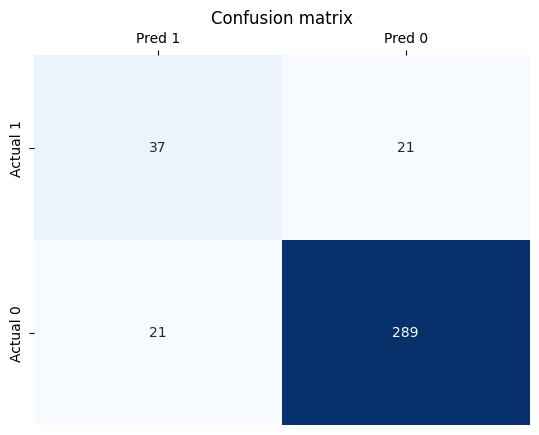

In [512]:
# Printing the classification report and confusion matrix
# Having a recall of 0.43 is really bad that means that 57% of the time we have an employee with attrition we classify them as being okay
# On the upside we have a False omition Rate of 0.12% and a specificity of 99% 
# which is not as bad but it makes sense since we have so many 0 attrition values for our models to learn from
y_pred = np.where(metrics['LR']['pred_proba'][:,1] >= 0.34, 1, 0)
print(classification_report(y_test, y_pred))

fig, ax = plt.subplots()
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
cm = pd.DataFrame(data= {'Pred 1': [TP, FP], 'Pred 0': [FN, TN]}, index = ['Actual 1', 'Actual 0'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap= 'Blues', ax= ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set(title="Confusion matrix")
plt.show()


<a href='#top'>back to top</a>

<a id='model_explanability'></a>
### 4.3 Model Explanability

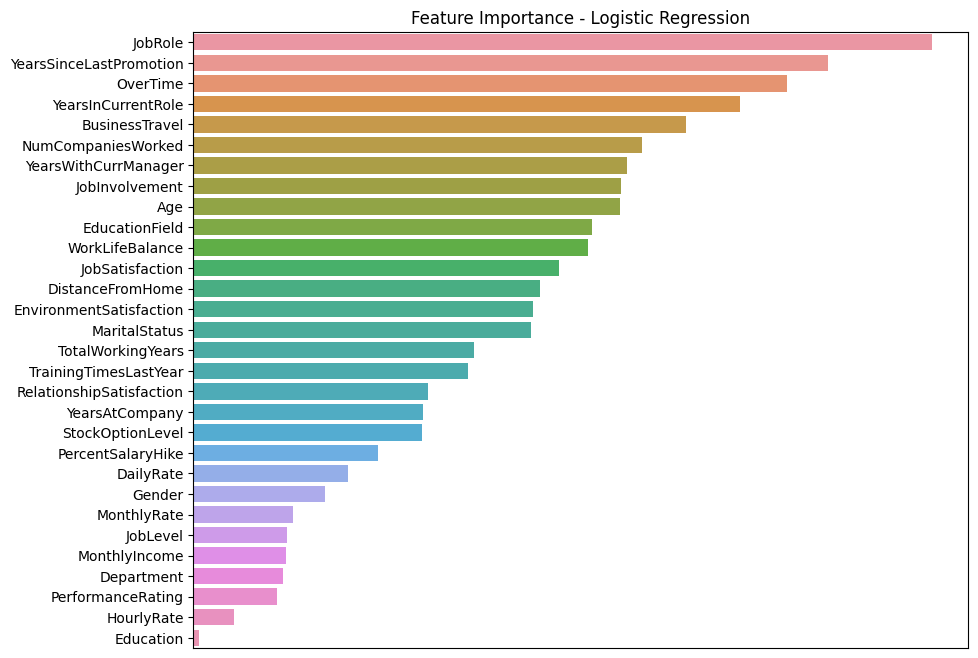

In [419]:
# We can see feature importance by looking at the weights given to each feature after the model trained
clf = joblib.load('models/LR.joblib')
plt.figure(figsize= (10, 8))
temp = pd.Series(np.abs(clf.coef_).T.ravel(), index=clf.feature_names_in_).sort_values(ascending=False)
sns.barplot(x= temp.values, y= temp.index)
plt.xticks([])
plt.title('Feature Importance - Logistic Regression')
plt.show()

In [44]:
import shap
np.random.seed(101)
shap.initjs()

In [84]:
explainer = shap.Explainer(clf, X_train_scaled, feature_names=clf.feature_names_in_)
shap_values = explainer(X_test_scaled)
shap_values.data = X_test.values # replacing normalized values with the features values for explanation interpretability

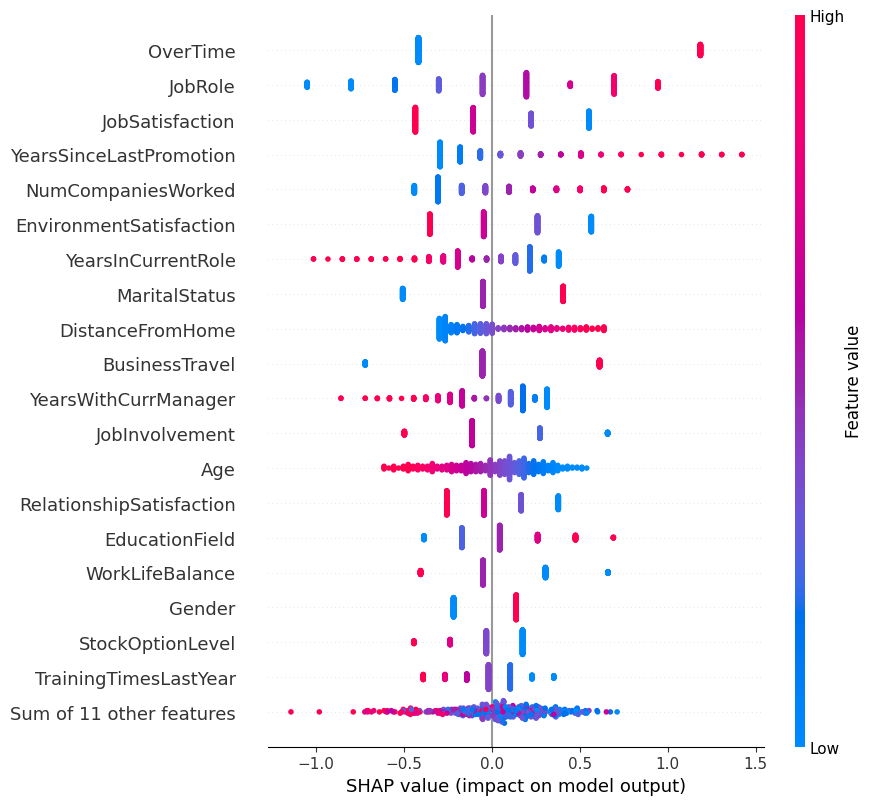

In [86]:
shap.plots.beeswarm(shap_values, max_display= 20, show=False)

======================================================= Example with Attrition ========================================================


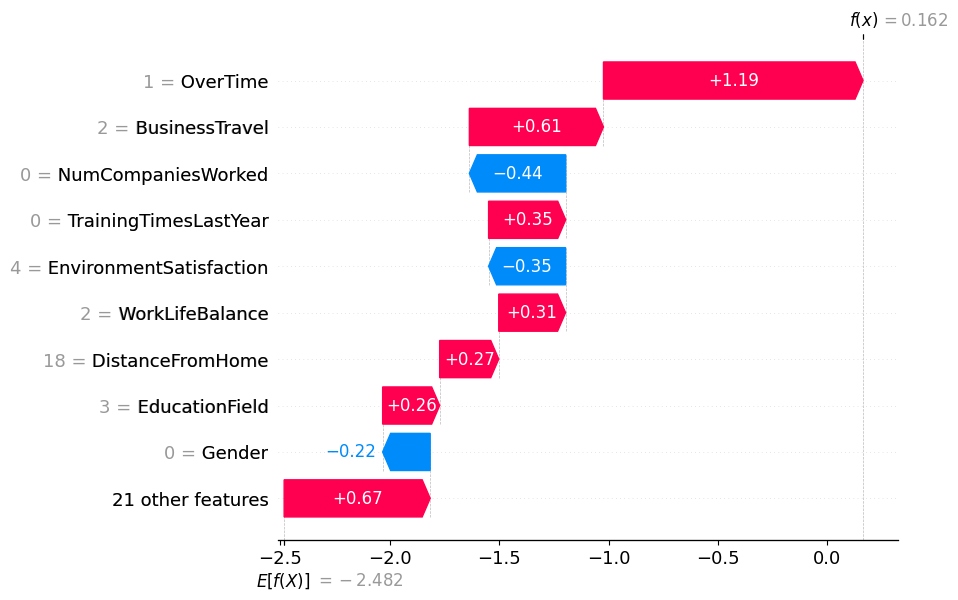

In [154]:
# as we can see travelling frequently, doing overtime are features that indicate attrition
ind = 2
print(f"{' Example with Attrition ':=^135}")
shap.plots.waterfall(shap_values[ind])

====================================================== Example with No Attrition ======================================================


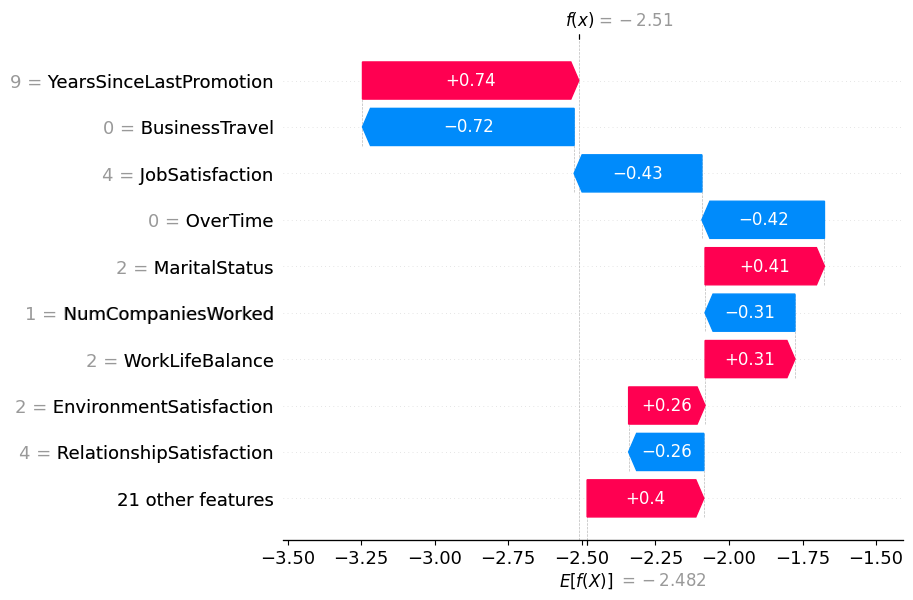

In [155]:
# while not travelling frequently, high job satisfaction, not doing overtime are features that indicate low attrition
ind = 0
print(f"{' Example with No Attrition ':=^135}")
shap.plots.waterfall(shap_values[ind])

<a href='#top'>back to top</a>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=#006699>📌 Future Note:</font></h3>

- Study to see if the people that left earned less than their colleges with the same JobRole do hypothesis test to prove this<br>
- Do cross validation together with randomized search on our hyper parameters in order to obtain the best estimator possible<br>
- Select features through the use of model wrappers or embedded methods<br>
- Create synthetic data to improve our models performance at identifying attrition values (1)<br>
- Create a machine learning pipeline to preprocess and train/predict the data<br></div>